## Loading graph from API -> NetworkX

In [1]:
import json
import networkx as nx
from kando import kando_client
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

In [3]:
def _parser(node, graph):
    # recursively build graph from end node
    if len(node['children']) == 0:
        graph.add_node(node['point_id'], name=node['point']['name'])
        return
    for child in node['children']:
        graph.add_edges_from([(node['point_id'], child['point_id'])],
                             weight=child['parent_distance'])
        _parser(child, graph)


def get_graph(point_id):
    g = client.network_graph(point_id)
    G = nx.DiGraph()
    _parser(g, G)
    return G.reverse(
    )  # we reverse because "children" in API are parents in NetworkX terms

In [7]:
with open('key.json') as f:
    api_login = json.load(f)

url = "https://kando-staging.herokuapp.com"
client = kando_client.client(url, api_login['key'], api_login['secret'])
G = get_graph(3316)

Kando - GET /api/data/network_graph?point_id=3316


In [8]:
G.degree(3316)  # number of successors

5

In [9]:
list(G.predecessors(3316))

[2664, 2663, 2607, 2657, 2627]

<div class="alert alert-block alert-info">
These nodes flow <i>into</i> 3316, so they are <i>predecessors</i>. <br>If you find this confusing you can remove the <code>reverse()</code> in <code>get_graph</code>.

In [10]:
nx.get_node_attributes(G, 'name')

{2771: 'בית שערים',
 2770: 'טבעון מזרח',
 2772: 'בית זיד',
 2791: 'אלכסנדר זייד',
 5226: 'רפת שדה יעקב',
 3172: 'יוקנעם מושבה צפון',
 3173: 'יוקנעם מושבה מרכז',
 4804: 'סולתם',
 4342: 'יקנעם הייטק צפון',
 2611: 'מסעדת הפניה',
 2629: 'פרומטאל',
 5124: 'מאסף התעשיה ',
 2630: 'סי פי סי',
 2617: 'לומיניס בע"מ',
 2613: 'דקסל פארמה',
 2612: 'קופיולאב',
 2628: 'כתר פלסטיק',
 3371: 'ברא צמחים',
 2619: 'אוסם השקעות',
 2773: 'אלרואי',
 2775: 'קרית חרושת',
 2774: 'מעלה טבעון',
 2789: 'כרומגן',
 2790: 'רפת שער העמקים'}

In [11]:
nx.get_edge_attributes(G, 'weight')

{(2664, 3316): 40,
 (2771, 2664): 25,
 (2770, 2664): 35,
 (2772, 2664): 20,
 (2791, 2664): 15,
 (2663, 3316): 35,
 (5226, 2663): 5,
 (2607, 3316): 50,
 (3172, 2607): 10,
 (3173, 2607): 42,
 (4341, 2607): 35,
 (2665, 4341): 2,
 (4804, 2665): 12,
 (4342, 2665): 5,
 (2611, 2665): 28,
 (2629, 2665): 30,
 (5124, 4341): 12,
 (5329, 4341): 3,
 (2630, 5329): 6,
 (2617, 5329): 7,
 (2613, 5329): 7,
 (2666, 4341): 20,
 (2612, 2666): 10,
 (2628, 2666): 10,
 (3371, 2666): 13,
 (2619, 2666): 10,
 (2657, 3316): 7,
 (2773, 2657): 25,
 (2775, 2657): 45,
 (2774, 2657): 40,
 (2627, 3316): 90,
 (2789, 2627): 20,
 (2790, 2627): 22}

In [12]:
nx.shortest_path(G, 4341, 3316, weight='weight', method='bellman-ford')

[4341, 2607, 3316]

In [13]:
nx.shortest_path_length(G, 4341, 3316, weight='weight')

85

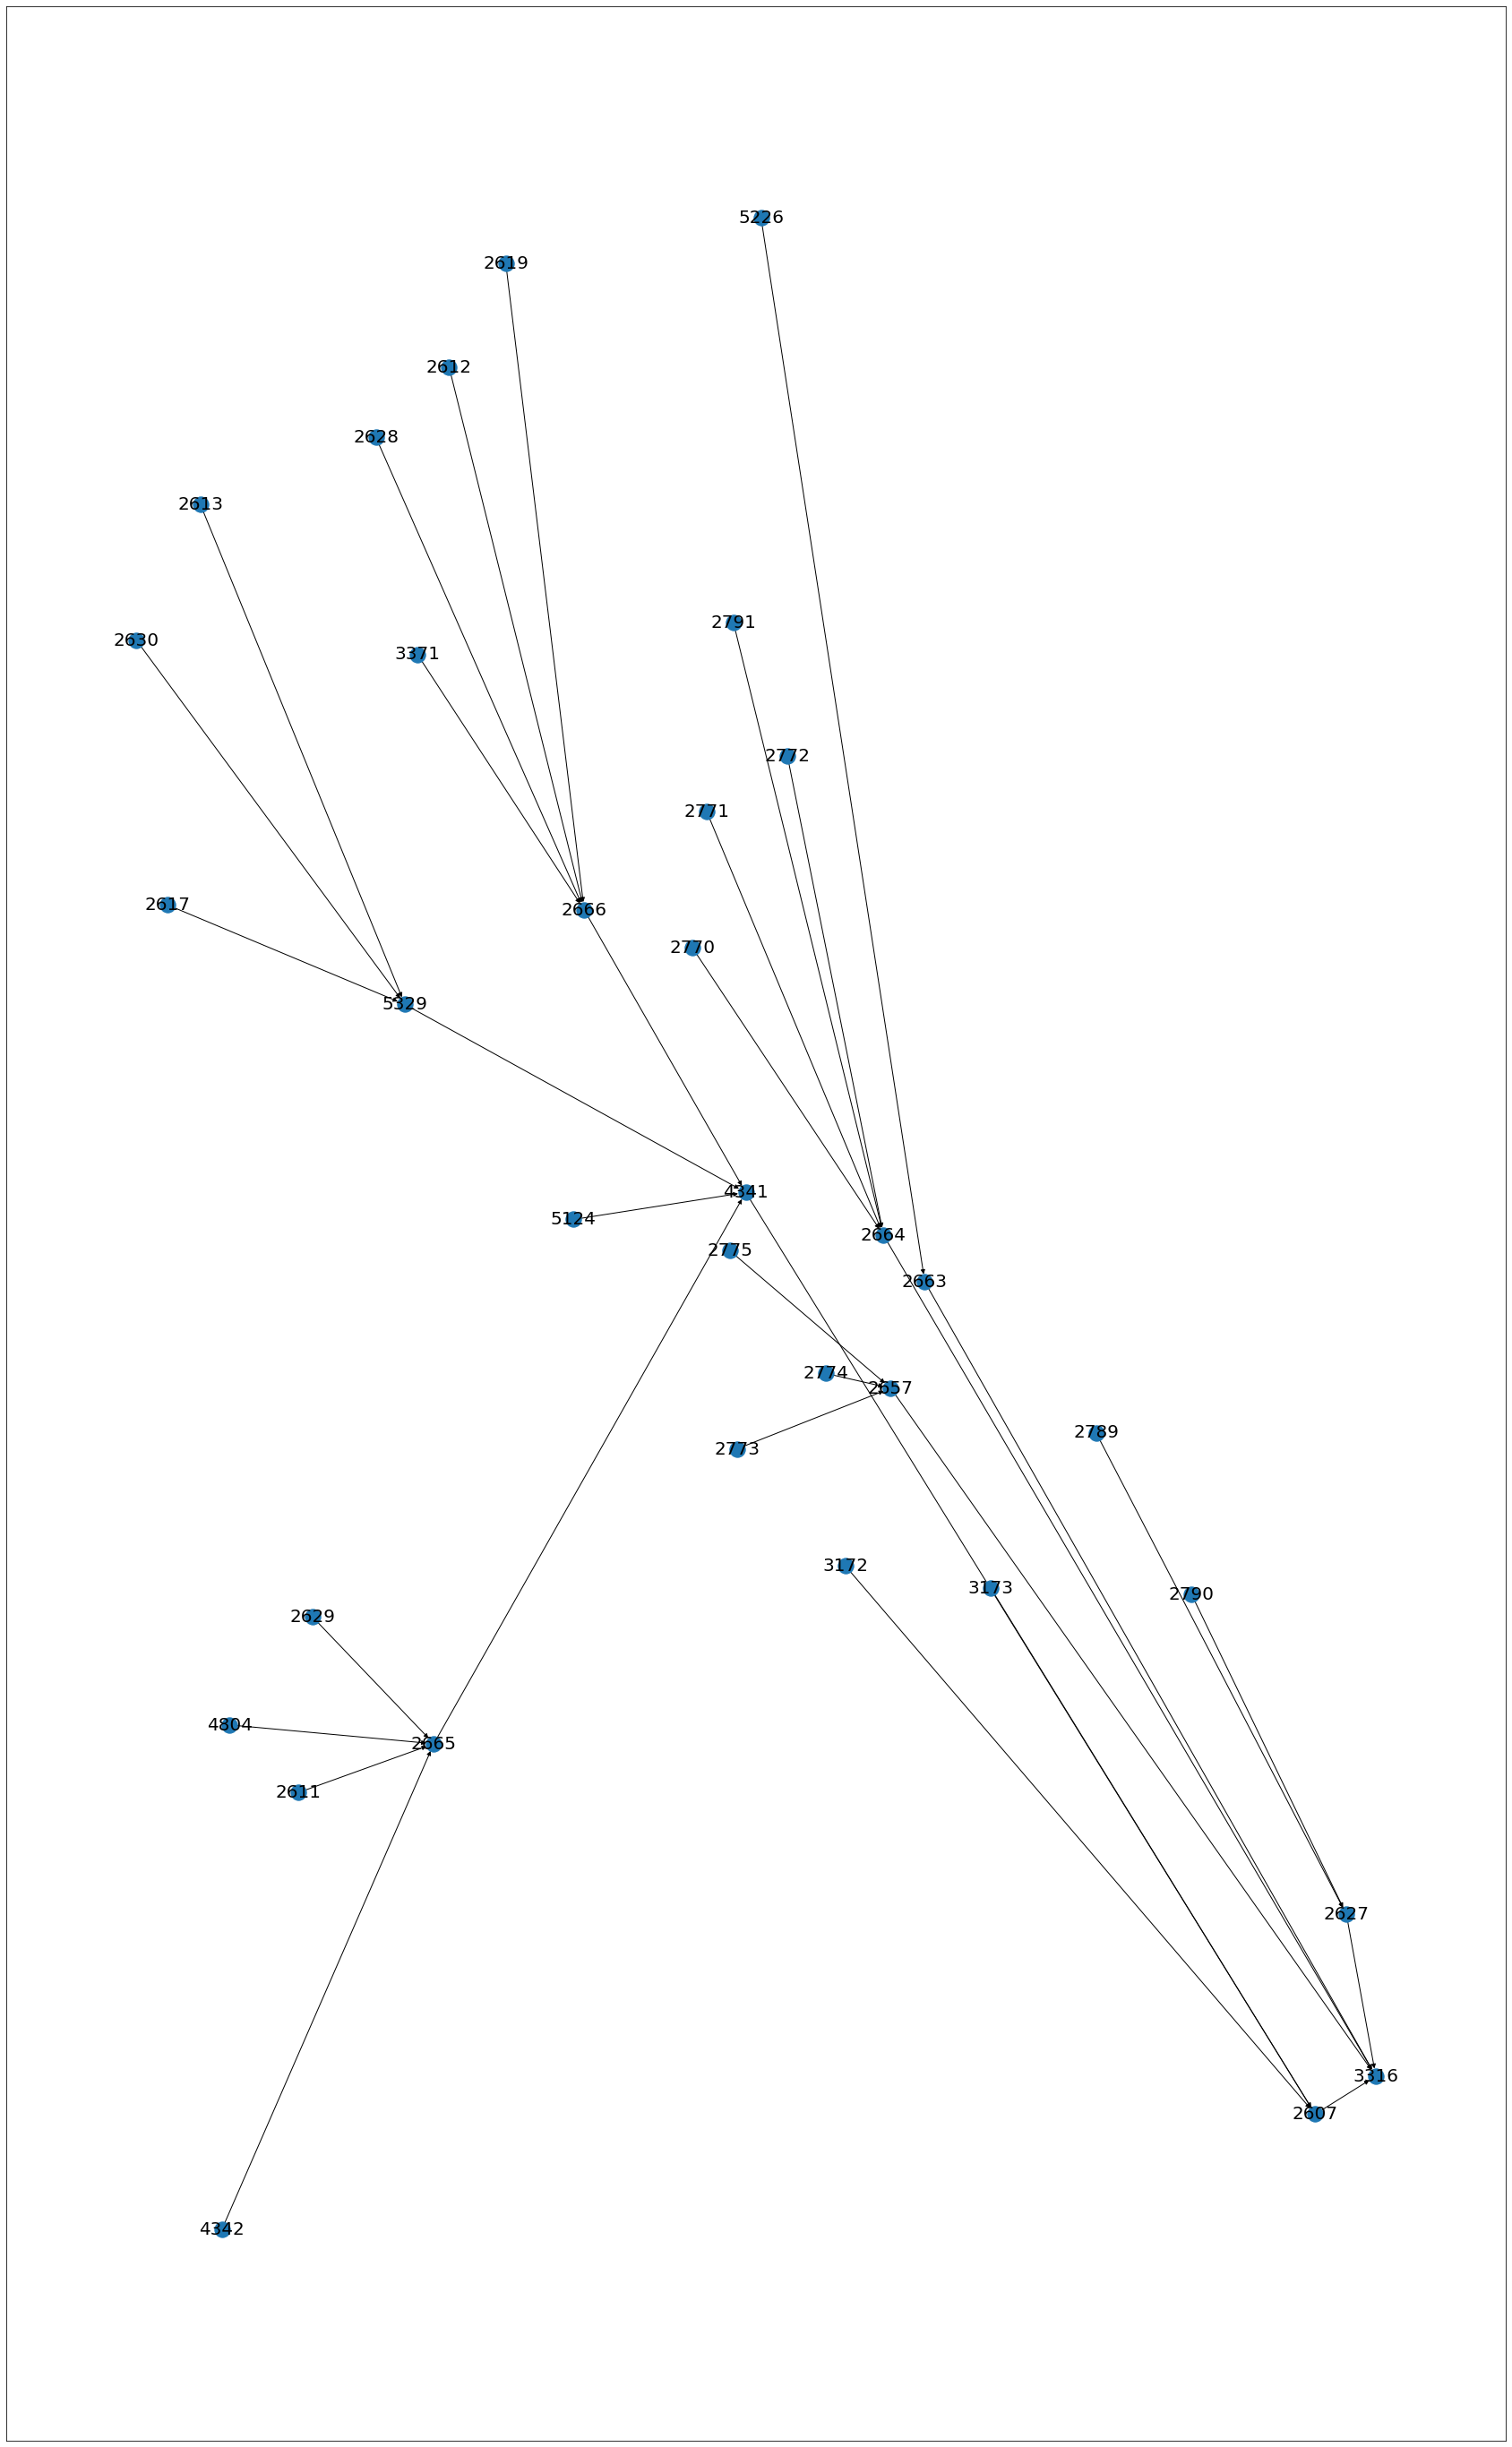

In [14]:
f, ax = plt.subplots(figsize=(30, 50))
nx.draw_networkx(G, ax=ax, font_size=20);